In [643]:
import cv2

In [644]:
import numpy as np

In [645]:
import matplotlib.pyplot as plt

In [646]:
import random

In [647]:
img = cv2.imread('./images/jan02/jan2-10.jpg', cv2.IMREAD_GRAYSCALE)

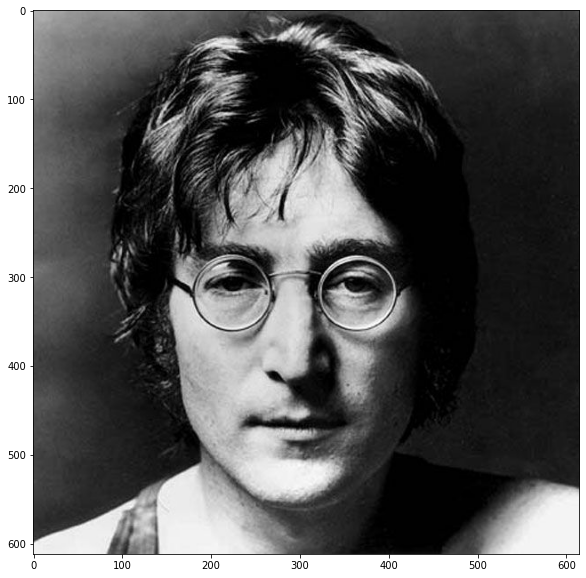

In [648]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

In [649]:
img = cv2.resize(img,(int(img.shape[1]*0.99),int(img.shape[0]*0.99)))

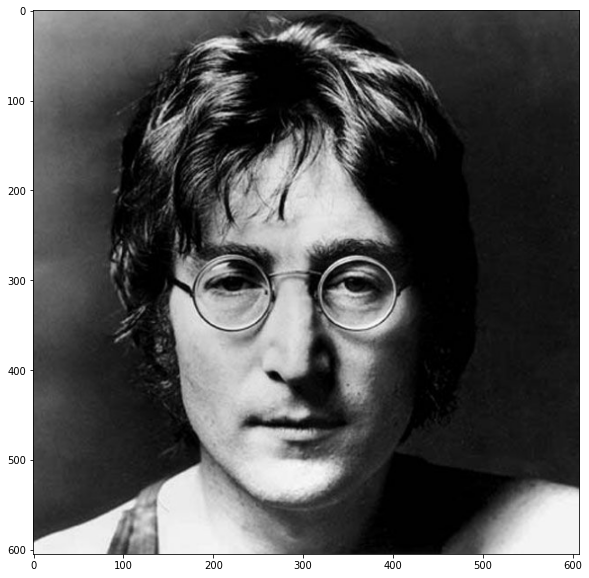

In [650]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

In [651]:
Z = img.reshape((-1,1))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8


ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

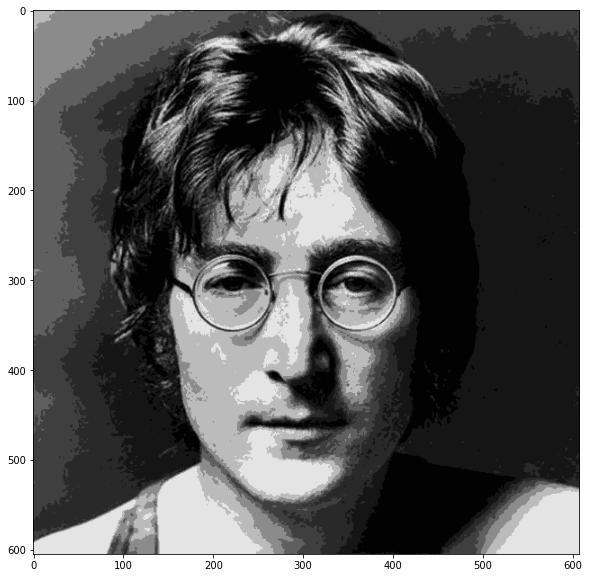

In [652]:
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_GRAY2RGB))

In [653]:
center = center.flatten()

In [654]:
np.random.uniform()

0.6761309620436196

In [655]:
def get_pixel_value(x):
    if np.random.uniform() > x/255:
        return np.int8(0)
    else:
        return np.int8(255)

In [656]:
img_dith = label.flatten().reshape((img.shape))

In [657]:
img_dith

array([[4, 4, 4, ..., 3, 2, 2],
       [4, 4, 4, ..., 3, 2, 2],
       [4, 4, 4, ..., 3, 3, 3],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [669]:
for y, row in enumerate(img_dith):
    for x, pixel in enumerate(row):
        res2[y][x] = get_pixel_value(center[img_dith[y][x]])

In [659]:
np.int8(res2)

array([[-1, -1, -1, ...,  0, -1, -1],
       [-1, -1,  0, ...,  0, -1,  0],
       [ 0, -1, -1, ..., -1, -1,  0],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int8)

In [660]:
plt.rcParams["figure.figsize"] = (20,10)

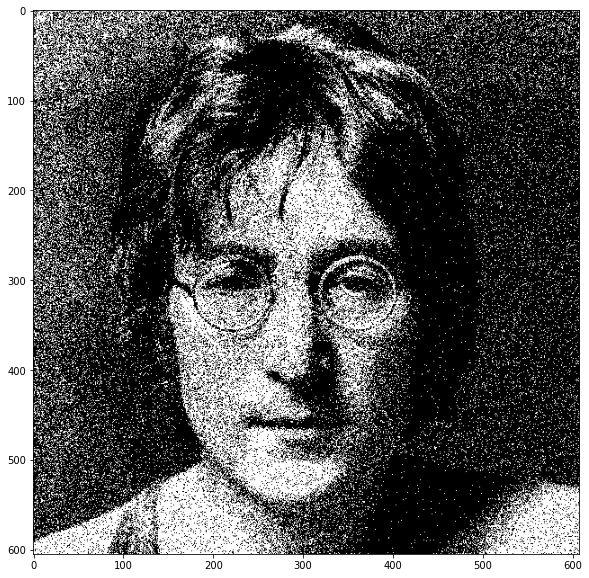

In [670]:
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_GRAY2RGB))

In [674]:
import imageio
images = []
for i in range(30):
    for y, row in enumerate(img_dith):
        for x, pixel in enumerate(row):
            res2[y][x] = get_pixel_value(center[img_dith[y][x]])
    print(i)
    images.append(res2.copy())
imageio.mimsave('./results/jan2/movie.gif', images)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
